# Project: Yelp Dataset
# Author: Akhilesh Somani
# University of Illinois at Urbana-Champaign

# Import basic packages

In [1]:
import json, tqdm, time, copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')
sns.set_context('talk')

# Data Preprocessing:

## WARNING: MAKE SURE TO EXTRACT THE JSON FILES IN A FOLDER NAMED 'Yelp_Dataset'. The JSON files are later deleted from the local PC to save space

## (1) Create filepaths to read data:

In [2]:
filename_prefix = 'Yelp_Dataset/yelp_academic_dataset_'
all_suffixes = ['business', 'checkin', 'review', 'tip', 'user']
filepaths = [filename_prefix + suffix + '.json' for suffix in all_suffixes]
csv_filepaths = [filename_prefix + suffix + '.csv' for suffix in all_suffixes]

## (2) Function to convert data from json to dataframes and save as csv:

In [3]:
def read_write_json_data():
    '''
    Reads json data into dataframes and writes them as csv files for later use
    '''
    
    # Read JSON files as dataframes    
    dataframes = []
    for file_num in range(len(filepaths)):
        tic = time.time()
        data = {}
        with open(filepaths[file_num] ,'r', encoding="latin-1") as file:
            for line in file:
                temp = json.loads(line)

                for key, val in temp.items():
                    if data.get(key, "not_found") == "not_found":
                        data[key] = [val]
                    else:
                        data[key].extend([val])

        dataframes.append(pd.DataFrame.from_dict(data))

        toc = time.time()
        print('Time to read {0} json file (in secs): {1}'.format(all_suffixes[file_num], (toc-tic)))
    
    print('\n')
    
    # Save dataframes as csv files
    
    ctr = 0
    for df in dataframes:
        tic = time.time()
        df.to_csv(csv_filepaths[ctr], index = False)
        toc = time.time()
        print('Time to save {0} as csv (in secs): {1}'.format(all_suffixes[ctr], (toc-tic)))
        ctr += 1
        
    return dataframes

## (3) Function to read csv data directly:

In [4]:
def read_csv_data():
    '''
    Reads csv files and saves them as dataframes
    '''
    dataframes = []
    for file in csv_filepaths:
        tic = time.time()
        temp = pd.read_csv(file)
        dataframes.append(temp)
        toc = time.time()
        print('Time to read {0} csv into a dataframe (in secs): {1}'.format(all_suffixes[csv_filepaths.index(file)],\
                                                                            (toc-tic)))
    return dataframes

# Read data as dataframes:

In [5]:
# If csv files are present, read them directly, else read the JSON files and save them as csv files
try:
    dataframes = read_csv_data()
except:
    print('No csv files found')
    dataframes = read_write_json_data()

Time to read business csv into a dataframe (in secs): 1.5731077194213867
Time to read checkin csv into a dataframe (in secs): 3.9722659587860107
Time to read review csv into a dataframe (in secs): 73.79304718971252
Time to read tip csv into a dataframe (in secs): 3.5660910606384277


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Time to read user csv into a dataframe (in secs): 41.680116415023804


# Create 'named' dataframes (for convenience):

In [6]:
business_df, checkin_df, review_df = dataframes[0], dataframes[1], dataframes[2]
tip_df, user_df = dataframes[3], dataframes[4]

In [20]:
business_df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN


# Data Exploration:

## (1) Number of data points:

In [51]:
for ctr in range(len(dataframes)):
    print("Number of data points: " + all_suffixes[ctr] + ' ' + str(len(dataframes[ctr]) / 1000) + 'k')

Number of data points: business 209.393k
Number of data points: checkin 175.187k
Number of data points: review 8021.122k
Number of data points: tip 1320.761k
Number of data points: user 1968.703k


## (2) Missing Values:

In [11]:
try:
    import missingno as msno
except: 
    import sys
    !{sys.executable} -m pip install missingno

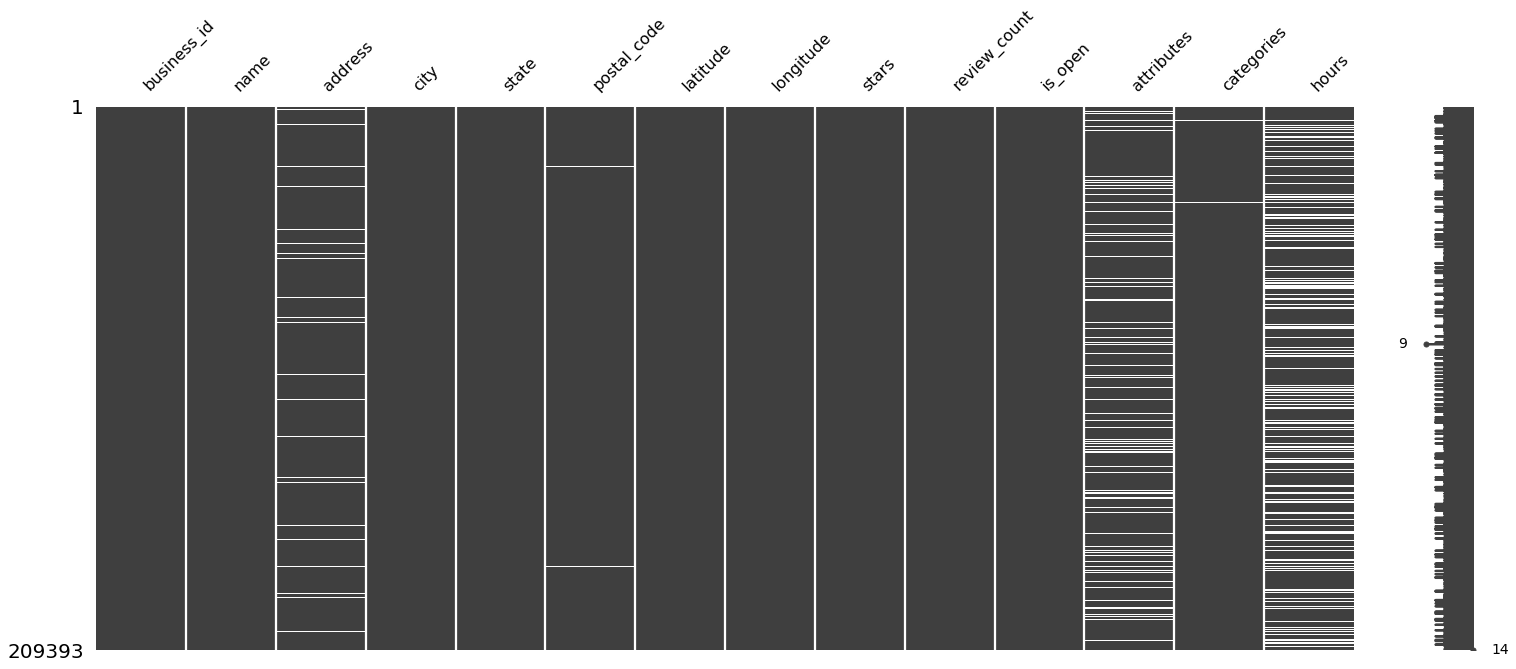

In [13]:
msno.matrix(business_df)

In [21]:
len(business_df.city.unique())

1251

In [23]:
business_df.groupby('city')['business_id'].count()

city
110 Las Vegas         1
4321 W Flamingo Rd    1
ARSENAL               1
AZ                    1
Agincourt             2
                     ..
toronto               3
Ãle-Perrot           1
Ãle-des-Soeurs       1
âAvondale           1
âGilbert            1
Name: business_id, Length: 1250, dtype: int64